In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from source import ground_truth

from getdist import plots, MCSamples

### Ground Truth

This notebook shows how to calculate the true likelihood (see equation (21)) given an observation. The observation used in the paper, the Wigner matrix metioned in the appendix and the covariance matrix used for the likelihood are provided in the data directory.

We start by loading the necessary data.

In [3]:
observation = np.load("../data/observation_data.npz")
gt_data = np.load("../data/ground_truth_data.npz")
survey_settings = np.load("../data/survey_settings.npz")

Now we evaluate the likelihood at a given cosmology. The parameter ordering is the same as in the other notebooks, namely: 

$\Omega_M$, $\Omega_b$, $h$, $n_s$, $\sigma_8$, $w_0$

In [4]:
sample_cosmo = np.array([ 0.3175, 0.049, 0.6711, 0.9624, 0.834, -1.])
cl_obs = np.concatenate(observation["observation_noisy_cl_binned_theo_reduced"])
log_likelihood = ground_truth.log_likelihood(cl_obs=cl_obs,
                                             cosmo=sample_cosmo,
                                             wigner_mat=gt_data["wigner_matrix"], 
                                             cov_mat=gt_data["covariance_matrix"], 
                                             n_cov=10000, 
                                             n_of_zs=survey_settings["n_of_z"])

Calculating spectra...


This function can be used to run an MCMC and evaluate the ground truth. We provide the MCMC samples for the __2D__ model. Here is an example on how to plot them.

Removed no burn in


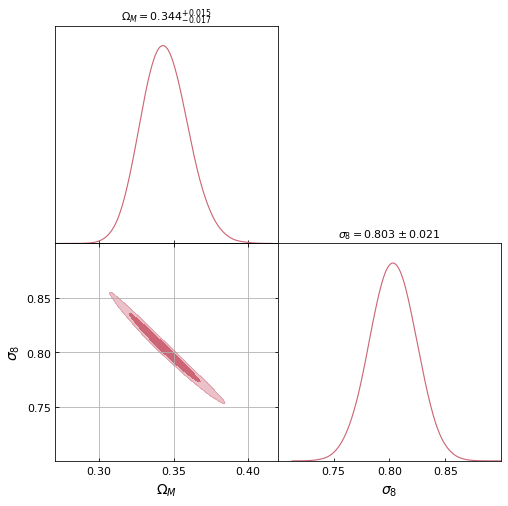

In [5]:
ndim = 2
names = ["x%s"%i for i in range(ndim)]
labels =  [r"\Omega_M", r"\sigma_8"]
chain_2d = MCSamples(samples=gt_data["2D_MCMC_samples"], labels=labels, names=names,
                     ranges={"x0": (0.27, 0.4),
                             "x1": (0.72, 0.9)})
chain_2d.removeBurn()

g = plots.getSubplotPlotter(4)
g.triangle_plot([chain_2d], filled=True, 
                param_limits={"x0": (0.27, 0.42),
                              "x1": (0.7, 0.9)},
                title_limit = 1,
                contour_colors = ["#CC6677"], 
                alpha=0.75)
g.subplots[1,0].grid()